# LSTM Model Training for Walmart Sales Forecasting

In this notebook, we will train an LSTM model for forecasting sales using the preprocessed data. We'll cover loading the preprocessed data, building the LSTM model, training it, and evaluating its performance.


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

import os

os.chdir(r"C:\Users\Arshraj\Desktop\GitHub\TimeSeries-Anomaly-Detection-Hub")
print(os.getcwd())

C:\Users\Arshraj\Desktop\GitHub\TimeSeries-Anomaly-Detection-Hub


In [5]:
# Load the preprocessed data
preprocessed_data_path = 'data/preprocessed/preprocessed_walmart_sales.csv'
data = pd.read_csv(preprocessed_data_path)

In [6]:
# Display basic information and the first few rows of the preprocessed dataset
print("Data Information:")
print(data.info())
print("\nFirst Few Rows:")
print(data.head())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     143 non-null    object 
 1   Store                    143 non-null    int64  
 2   Weekly_Sales             143 non-null    float64
 3   Holiday_Flag             143 non-null    int64  
 4   Temperature              143 non-null    float64
 5   Fuel_Price               143 non-null    float64
 6   CPI                      143 non-null    float64
 7   Unemployment             143 non-null    float64
 8   normalized_Weekly_Sales  143 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 10.2+ KB
None

First Few Rows:
         Date  Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0  05-02-2010      3     461622.22             0        45.71       2.572   
1  12-02-2010      3     420728.96           

In [8]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Weekly_Sales']])

In [9]:
# Prepare the data for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 30  # Number of previous days to consider for forecasting
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split_index = int(0.8 * len(X))  # 80% for training
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [10]:
# Reshape data to fit LSTM input requirements
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [18]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Arshraj\anaconda3\envs\myenv1\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - loss: 0.0996 - val_loss: 0.0266
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0394 - val_loss: 0.0301
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0510 - val_loss: 0.0136
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0419 - val_loss: 0.0159
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - val_loss: 0.0197
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0510 - val_loss: 0.0180
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0352 - val_loss: 0.0151
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0443 - val_loss: 0.0129
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0336 - val_loss: 0.0125
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0413 - val_loss: 0.0130
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0354 - val_loss: 0.0135
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0361 - val_loss: 0.0137


In [20]:
# Evaluate the model
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


In [21]:
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'RMSE: {rmse}')

RMSE: 15293.702940675501


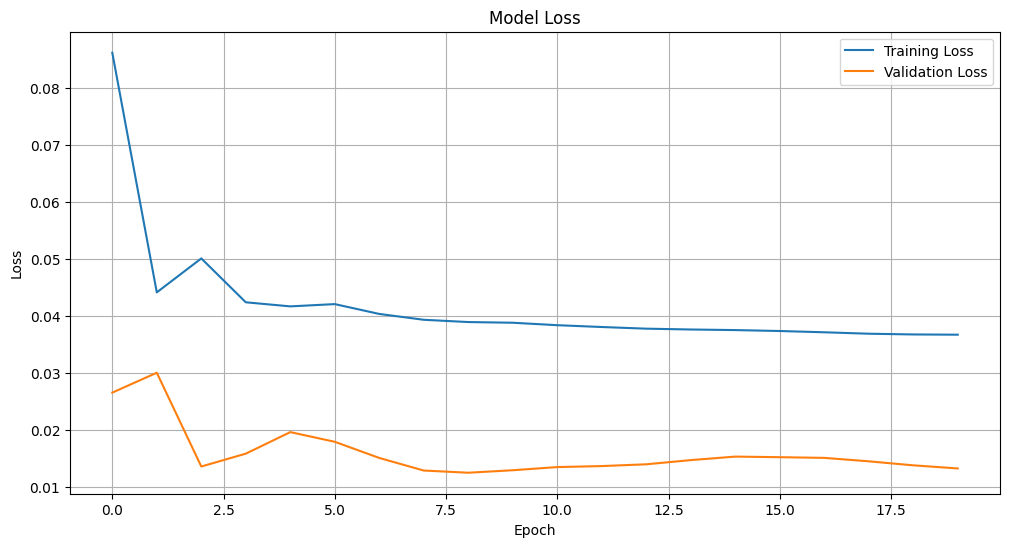

In [22]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

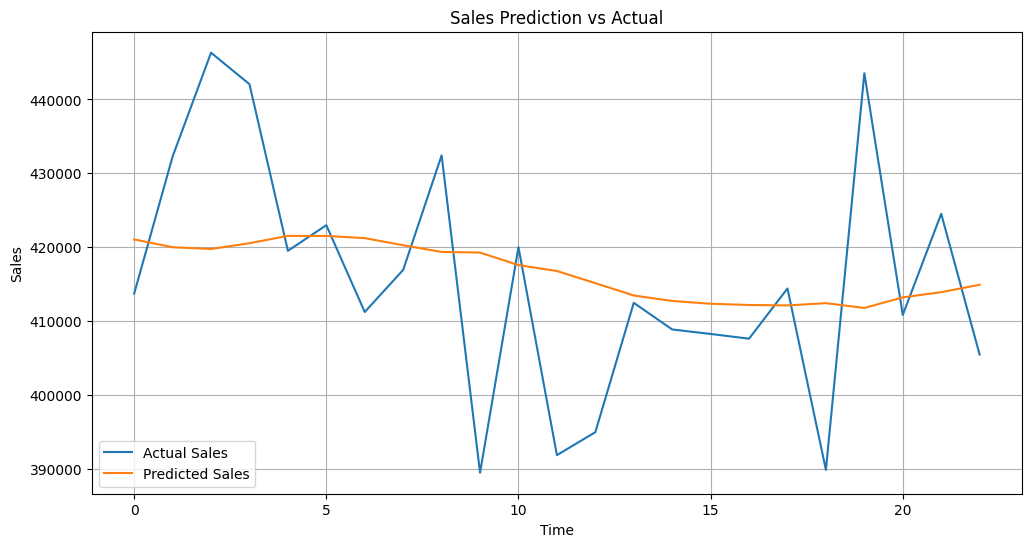

In [23]:

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_test_inv)), y_test_inv, label='Actual Sales')
plt.plot(np.arange(len(y_pred_inv)), y_pred_inv, label='Predicted Sales')
plt.title('Sales Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Save the model
model.save('models/lstm_model.h5')